In [1]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
from PIL import Image
from tqdm import tqdm
from torch.utils.data import DataLoader
from utils.utils import *

random.seed(1)

# Autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
data_folder = "data"

image_files = [f for f in os.listdir(data_folder) if f.endswith("png")]

### Chose a random image to train a neural representation on

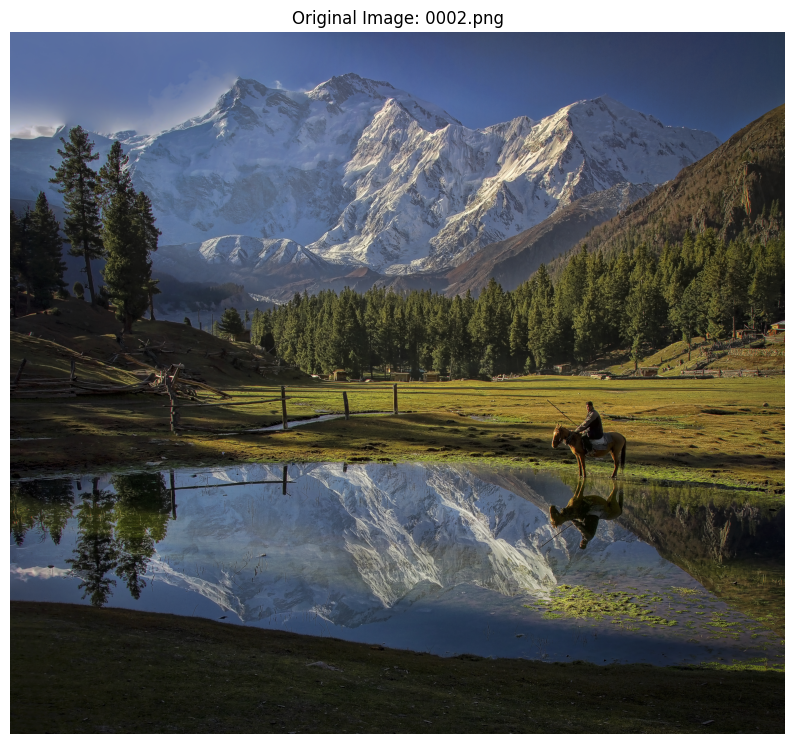

Image dimensions: 1848x2040, 3 channels


In [3]:
# Choose a random image to train on
img_file_path = '0002.png'
img_path = os.path.join(data_folder, img_file_path)
img_original = Image.open(img_path)

# Convert image to numpy array
img_np_original = np.array(img_original)

# Display the original image
plt.figure(figsize=(10, 10))
plt.imshow(img_np_original)
plt.axis("off")
plt.title(f"Original Image: {img_file_path}")
plt.show()

# Get image dimensions
height_target, width_target, channels = img_np_original.shape
print(f"Image dimensions: {height_target}x{width_target}, {channels} channels")

Downsize factor: 2


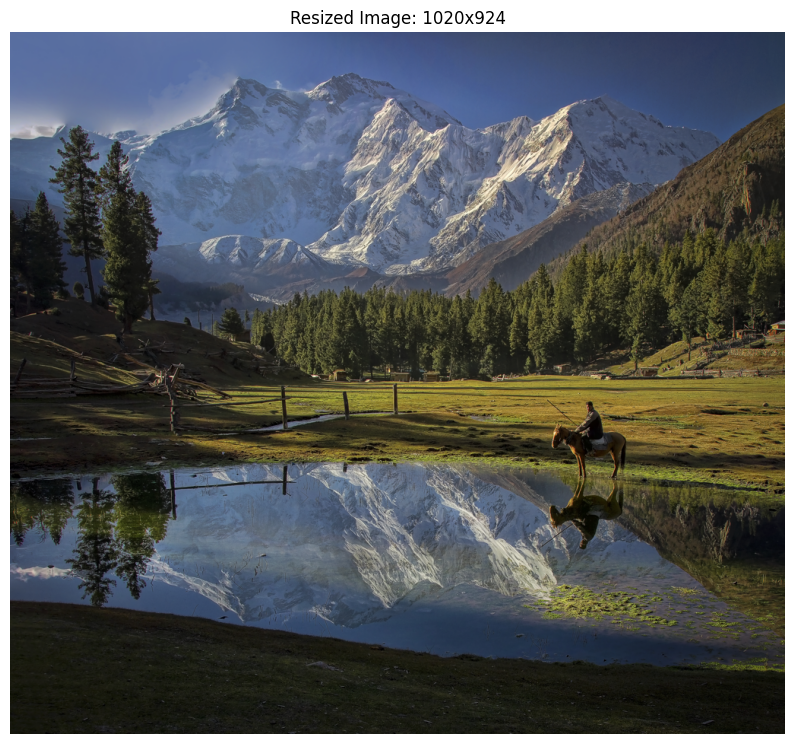

Resized image dimensions: 924x1020, 3 channels


In [4]:
# Now we will downsize the original image to a smaller resolution using a random integer factor
downsize_factor = 2
print(f"Downsize factor: {downsize_factor}")
img_resized = img_original.resize((width_target // downsize_factor, height_target // downsize_factor))

# convert image to numpy array
img_np_resized = np.array(img_resized)

# Display the resized image
plt.figure(figsize=(10, 10))
plt.imshow(img_np_resized)
plt.axis("off")
plt.title(f"Resized Image: {width_target // downsize_factor}x{height_target // downsize_factor}")
plt.show()

# Print the resolution of the new image
height_resized, width_resized, channels = img_np_resized.shape
print(f"Resized image dimensions: {height_resized}x{width_resized}, {channels} channels")

### We will next normalize the pixels to have values between 0 and 1

In [5]:
# Normalize the resized image
img_np_resized_standardized = img_np_resized / 255.0  # Normalize to [0, 1]

In [6]:
# Print the mean of the resized image
print(f"Resized image mean: {np.mean(img_np_resized_standardized, axis=(0, 1))}")
print(f"Resized image std: {np.std(img_np_resized_standardized, axis=(0, 1))}")

Resized image mean: [0.27553088 0.29088383 0.29604931]
Resized image std: [0.15840336 0.16081206 0.20442507]


### Normalize the coordinates of the image to be between 0 and 1.

In [7]:
normalized_coordinates = get_normalized_coordinates(height_resized, width_resized)
pixel_values = img_np_resized_standardized.reshape(-1, channels)

# Check shapes
print(f"Normalized coordinates shape: {normalized_coordinates.shape}")
print(f"Pixel values shape: {pixel_values.shape}")

Normalized coordinates shape: (942480, 2)
Pixel values shape: (942480, 3)


### Create the dataset and dataloader for the downsampled image

In [8]:
# Create dataset and dataloader
dataset = ImageDataset(normalized_coordinates, pixel_values)
dataloader = DataLoader(dataset, batch_size=4096, shuffle=True)

  0%|          | 1/500 [00:03<32:56,  3.96s/it]

Epoch 0, Loss: 0.032573


  2%|▏         | 11/500 [00:42<31:35,  3.88s/it]

Epoch 10, Loss: 0.011664


  4%|▍         | 21/500 [01:21<30:23,  3.81s/it]

Epoch 20, Loss: 0.010726


  6%|▌         | 31/500 [01:59<29:56,  3.83s/it]

Epoch 30, Loss: 0.010114


  8%|▊         | 41/500 [02:37<29:02,  3.80s/it]

Epoch 40, Loss: 0.009832


 10%|█         | 51/500 [03:15<28:49,  3.85s/it]

Epoch 50, Loss: 0.009685


 12%|█▏        | 61/500 [03:53<28:11,  3.85s/it]

Epoch 60, Loss: 0.009520


 14%|█▍        | 71/500 [04:32<27:44,  3.88s/it]

Epoch 70, Loss: 0.009448


 16%|█▌        | 81/500 [05:11<26:48,  3.84s/it]

Epoch 80, Loss: 0.009380


 18%|█▊        | 91/500 [05:50<26:13,  3.85s/it]

Epoch 90, Loss: 0.009306


 20%|██        | 101/500 [06:28<25:31,  3.84s/it]

Epoch 100, Loss: 0.009267


 22%|██▏       | 111/500 [07:07<24:57,  3.85s/it]

Epoch 110, Loss: 0.009219


 24%|██▍       | 121/500 [07:45<24:08,  3.82s/it]

Epoch 120, Loss: 0.009226


 26%|██▌       | 131/500 [08:24<23:55,  3.89s/it]

Epoch 130, Loss: 0.009223


 28%|██▊       | 141/500 [09:02<22:56,  3.83s/it]

Epoch 140, Loss: 0.009192


 30%|███       | 151/500 [09:41<22:38,  3.89s/it]

Epoch 150, Loss: 0.009159


 32%|███▏      | 161/500 [10:19<21:54,  3.88s/it]

Epoch 160, Loss: 0.009174


 34%|███▍      | 171/500 [10:58<20:52,  3.81s/it]

Epoch 170, Loss: 0.009122


 36%|███▌      | 181/500 [11:37<21:19,  4.01s/it]

Epoch 180, Loss: 0.009118


 38%|███▊      | 191/500 [12:16<19:59,  3.88s/it]

Epoch 190, Loss: 0.009103


 40%|████      | 201/500 [12:56<19:31,  3.92s/it]

Epoch 200, Loss: 0.009084


 42%|████▏     | 211/500 [13:35<18:58,  3.94s/it]

Epoch 210, Loss: 0.009097


 44%|████▍     | 221/500 [14:15<18:23,  3.96s/it]

Epoch 220, Loss: 0.009100


 46%|████▌     | 231/500 [14:54<17:34,  3.92s/it]

Epoch 230, Loss: 0.009057


 48%|████▊     | 241/500 [15:33<16:56,  3.92s/it]

Epoch 240, Loss: 0.009044


 50%|█████     | 251/500 [16:12<15:45,  3.80s/it]

Epoch 250, Loss: 0.009029


 52%|█████▏    | 261/500 [16:50<15:08,  3.80s/it]

Epoch 260, Loss: 0.009030


 54%|█████▍    | 271/500 [17:30<14:57,  3.92s/it]

Epoch 270, Loss: 0.009022


 56%|█████▌    | 281/500 [18:11<14:41,  4.02s/it]

Epoch 280, Loss: 0.008974


 58%|█████▊    | 291/500 [18:49<13:29,  3.87s/it]

Epoch 290, Loss: 0.009014


 60%|██████    | 301/500 [19:28<12:39,  3.82s/it]

Epoch 300, Loss: 0.009027


 62%|██████▏   | 311/500 [20:06<12:04,  3.83s/it]

Epoch 310, Loss: 0.008994


 64%|██████▍   | 321/500 [20:44<11:24,  3.82s/it]

Epoch 320, Loss: 0.009011


 66%|██████▌   | 331/500 [21:22<10:44,  3.81s/it]

Epoch 330, Loss: 0.008972


 68%|██████▊   | 341/500 [22:00<10:11,  3.85s/it]

Epoch 340, Loss: 0.008985


 70%|███████   | 351/500 [22:39<09:37,  3.88s/it]

Epoch 350, Loss: 0.008964


 72%|███████▏  | 361/500 [23:18<09:01,  3.90s/it]

Epoch 360, Loss: 0.008966


 74%|███████▍  | 371/500 [23:58<08:27,  3.93s/it]

Epoch 370, Loss: 0.008980


 76%|███████▌  | 381/500 [24:37<07:44,  3.90s/it]

Epoch 380, Loss: 0.008927


 78%|███████▊  | 391/500 [25:16<07:07,  3.93s/it]

Epoch 390, Loss: 0.008945


 80%|████████  | 401/500 [25:55<06:31,  3.95s/it]

Epoch 400, Loss: 0.008950


 82%|████████▏ | 411/500 [26:35<05:52,  3.96s/it]

Epoch 410, Loss: 0.008929


 84%|████████▍ | 421/500 [27:14<05:05,  3.87s/it]

Epoch 420, Loss: 0.008966


 86%|████████▌ | 431/500 [27:53<04:26,  3.86s/it]

Epoch 430, Loss: 0.008920


 88%|████████▊ | 441/500 [28:31<03:47,  3.85s/it]

Epoch 440, Loss: 0.008936


 90%|█████████ | 451/500 [29:10<03:08,  3.85s/it]

Epoch 450, Loss: 0.008923


 92%|█████████▏| 461/500 [29:48<02:29,  3.84s/it]

Epoch 460, Loss: 0.008919


 94%|█████████▍| 471/500 [30:26<01:51,  3.84s/it]

Epoch 470, Loss: 0.008914


 96%|█████████▌| 481/500 [31:04<01:12,  3.82s/it]

Epoch 480, Loss: 0.008923


 98%|█████████▊| 491/500 [31:42<00:34,  3.80s/it]

Epoch 490, Loss: 0.008933


100%|██████████| 500/500 [32:17<00:00,  3.87s/it]


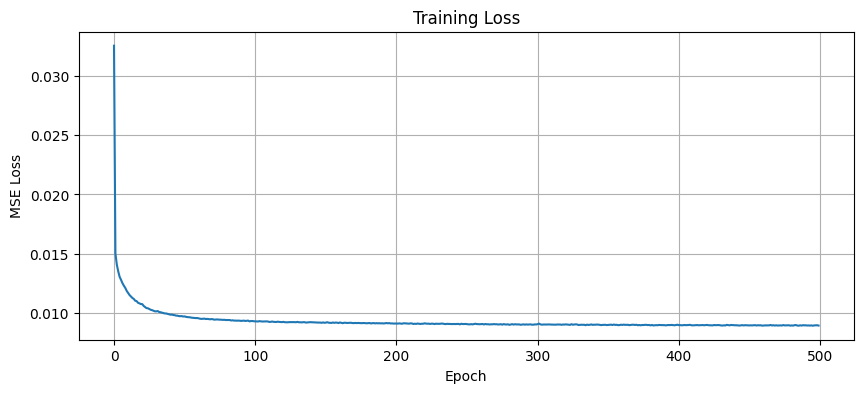

In [9]:
# Create and train the model
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
criterion = torch.nn.MSELoss()
model = INRModel(input_dim=2, output_dim=channels, hidden_dim=126, num_layers=6, dropout_rate=0.5).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
losses = model.train_model(dataloader, num_epochs=500, lr=1e-3, device=device, criterion = criterion, optimizer = optimizer)

# Plot the loss curve
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

Max and Min values of pred_pixels: 0.8241466283798218, 0.006449061445891857


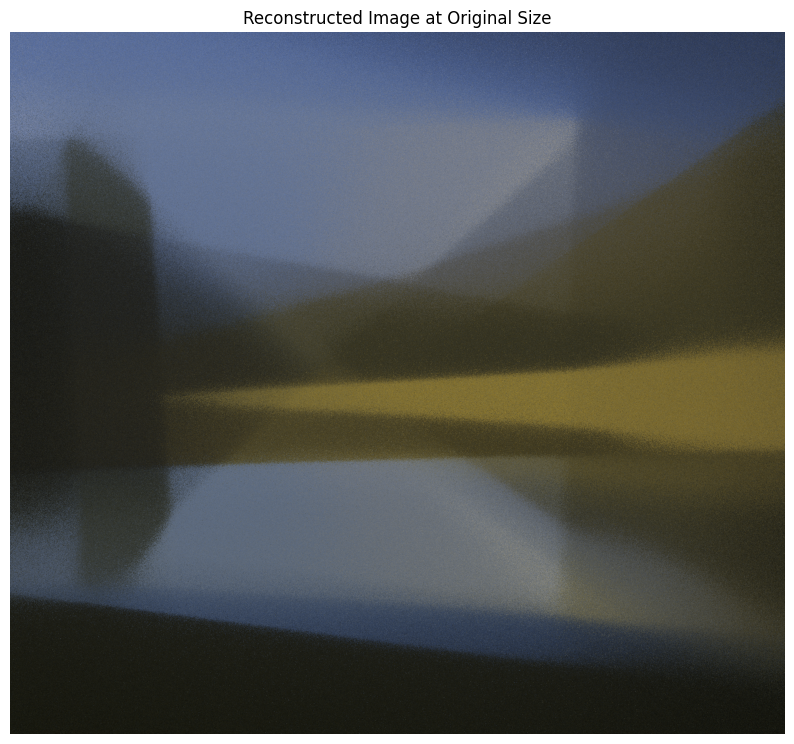

Downsized image shape: (924, 1020, 3)
Reconstructed image shape: (1848, 2040, 3)
Original image shape: (1848, 2040, 3)


In [10]:
# Generate normalized coordinates for the original image size
target_coords_normalized = get_normalized_coordinates(height_target, width_target)

# Convert to PyTorch tensor
target_coords_tensor = torch.from_numpy(target_coords_normalized).float().to(device)

# Use the trained model to predict the RGB values for these coordinates
with torch.no_grad():
    pred_pixels = model(target_coords_tensor).cpu().numpy()
    
print(f"Max and Min values of pred_pixels: {np.max(pred_pixels)}, {np.min(pred_pixels)}")

# Denormalize the RGB values using the mean and std of the resized image (i.e the training data)
reconstructed_img_reshaped_normalized = pred_pixels.reshape(height_target, width_target, channels)
# Convert to integer type and denormalize
reconstructed_img_reshaped_denormalized = (reconstructed_img_reshaped_normalized * 255).astype(np.uint8)
# IMPORTANT: Need to round the pixels to the nearest integer value and clip them to [0, 255] range
reconstructed_img_reshaped_denormalized = np.clip(reconstructed_img_reshaped_denormalized, 0, 255)

# Display the reconstructed image
plt.figure(figsize=(10, 10))
plt.imshow(reconstructed_img_reshaped_denormalized)
plt.title('Reconstructed Image at Original Size')
plt.axis('off')
plt.show()

# Check that the shapes of the reconstructed image and original image are the same

print(f"Downsized image shape: {img_np_resized.shape}")
print(f"Reconstructed image shape: {reconstructed_img_reshaped_denormalized.shape}")
print(f"Original image shape: {img_np_original.shape}")